In [1]:
using Printf

function sum_elements(array)
    return_tmp = 0
    for i= 1:length(array)
        return_tmp+=array[i]
    end
    return return_tmp
end

function recursive_sum_elements(myArray, acc, stop, i)
    if i==stop
        return acc
    else
        tmp=pop!(myArray)
        acc+=tmp
        i++
        return recursive_sum_elements(myArray, acc, stop, i)
    end
end

function recursive_sum_elements2(myArray, myStart, myEnd)
    #if (myEnd - myStart) > 0
    #    myStart= recursive_sum_elements2(myArray, myStart, Int64((myEnd-myStart)*0.5))
    #    myEnd =  recursive_sum_elements2(myArray, Int64((myEnd-myStart)*0.5)+1, myEnd)
    #    return myStart + myEnd
    #else
    #    return myArray[myEnd]
    #end
    if myStart >= myEnd
        return myArray[myStart]
    else
        middle = Int64(floor(((myStart + myEnd)/2)))
        return recursive_sum_elements2(myArray, myStart, middle) + recursive_sum_elements2(myArray, middle+1, myEnd)
    end
end
    
function simple_multiplication(a,b)
    return a*b
end

function absolute(a,b)
    return abs(a-b)
end

function relative(a,b)
    return absolute(a,b)/ b
end

function sumSubArray(arrAbs, arrRel, arrLen, array, myStep)
    mySum = 0
    myValue = array[1]
    range = Int64(length(array)/ myStep)
    #@printf "%d" range
    for i= 1:range
        for j= 1:myStep
            mySum += array[myStep*(i-1) + j]
            #@printf "Dodalem"
        end
        realVal = myValue * i * myStep
        tmpAbs = absolute(mySum, realVal)
        push!(arrAbs, tmpAbs)
        tmpRel = relative(mySum, realVal)
        push!(arrRel, tmpRel)
        push!(arrLen, Int64(range*i))
    end
end

sumSubArray (generic function with 1 method)

In [2]:
my_range = 10000000
my_variable=Float32(pop!(rand(1)))
array = Float32[]
arrayCopy = Float32[]
for i=1:my_range
    push!(array, my_variable)
    push!(arrayCopy, my_variable)
end
my_variable

0.56941545f0

In [3]:
mySum = sum_elements(array)

5.3277955f6

In [4]:
bitstring(mySum)

"01001010101000101001011101100111"

In [5]:
myMult = simple_multiplication(my_range, my_variable)

5.6941545f6

In [6]:
bitstring(myMult)

"01001010101011011100010110010101"

In [7]:
myAbsError = absolute(mySum, myMult)

366359.0f0

In [8]:
myRelError = relative(mySum, myMult)

0.06433949f0

In [9]:
arrAbsErr = Float32[]
arrRelErr = Float32[]
arrLenght = Int64[]
myStep = 1000
sumSubArray(arrAbsErr, arrRelErr, arrLenght, array, myStep)
arrAbsErr

10000-element Array{Float32,1}:
      0.0025024414
      0.0036621094
      0.03894043  
      0.032226562 
      0.04736328  
      0.12670898  
      0.20605469  
      0.28564453  
      0.36523438  
      0.44482422  
      0.5239258   
      0.6035156   
      0.68310547  
      ⋮           
 365595.5         
 365665.0         
 365734.5         
 365803.5         
 365873.0         
 365942.5         
 366012.0         
 366081.5         
 366151.0         
 366220.0         
 366289.5         
 366359.0         

In [10]:
arrRelErr

10000-element Array{Float32,1}:
 4.394755e-6 
 3.2156743e-6
 2.2795559e-5
 1.4148967e-5
 1.6635755e-5
 3.7087444e-5
 5.1695795e-5
 6.270565e-5 
 7.126887e-5 
 7.811945e-5 
 8.364651e-5 
 8.832386e-5 
 9.228161e-5 
 ⋮           
 0.06427611  
 0.06428189  
 0.06428767  
 0.06429337  
 0.06429915  
 0.064304926 
 0.06431071  
 0.06431648  
 0.064322256 
 0.06432795  
 0.06433372  
 0.06433949  

In [11]:
arrLenght

10000-element Array{Int64,1}:
     10000
     20000
     30000
     40000
     50000
     60000
     70000
     80000
     90000
    100000
    110000
    120000
    130000
         ⋮
  99890000
  99900000
  99910000
  99920000
  99930000
  99940000
  99950000
  99960000
  99970000
  99980000
  99990000
 100000000

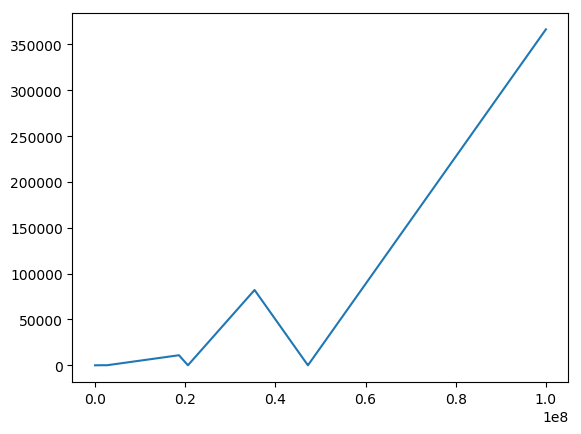

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002D8EC438>

In [12]:
using PyPlot
PyPlot.plot(arrLenght, arrAbsErr)

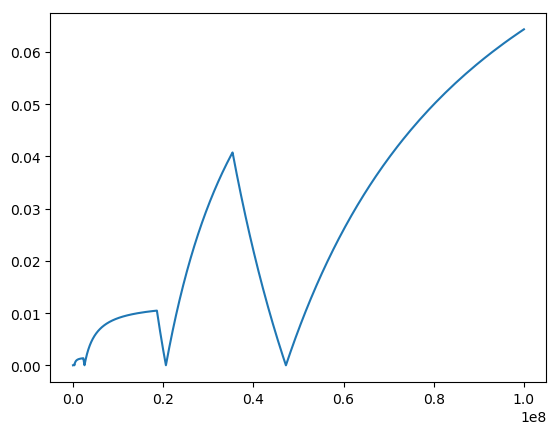

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002DA40A20>

In [13]:
PyPlot.plot(arrLenght, arrRelErr)

In [14]:
#mySumRecursive = Float32(0)
#stop=100
#i=0
#for j=1:(my_range/stop)
#    recursive_sum_elements(arrayCopy, mySumRecursive, stop, i)
#end

recSum = recursive_sum_elements2(arrayCopy, 1, 10000000)

5.694154f6

In [15]:
myMult

5.6941545f6